In [1]:
import sys
sys.path.insert(0, '/Users/rogierlandman/Documents/GitHub/surfboard/')
from surfboard.sound import Waveform
from surfboard.feature_extraction import extract_features
import matplotlib.pyplot as plt
import librosa
import librosa.display



Extracting features...: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 79.47it/s]


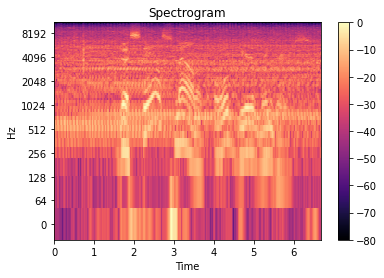

In [3]:
sound = Waveform(path='./audio_files_jackhammer.wav')
result = extract_features([sound], ['log_melspec'])
log_melspec_array = result['log_melspec'][0]

fig, ax = plt.subplots()
img = librosa.display.specshow(log_melspec_array,y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax)

Extracting features...: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 117.15it/s]


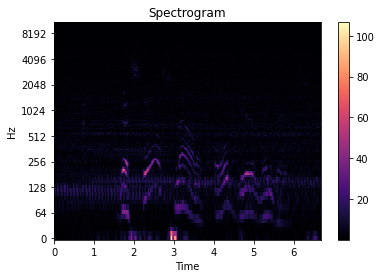

In [4]:
result = extract_features([sound], ['magnitude_spectrum'])
magspec_array = result['magnitude_spectrum'][0]

fig, ax = plt.subplots()
img = librosa.display.specshow(magspec_array,y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax)

Extracting features...: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.98it/s]


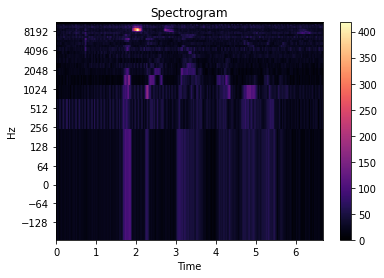

In [5]:
result = extract_features([sound], ['bark_spectrogram'])
bark_spectrogram_array = result['bark_spectrogram'][0]

fig, ax = plt.subplots()
img = librosa.display.specshow(bark_spectrogram_array,y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax)

# Result as ndarray

In [54]:
NFFT_sec = 0.06
HOP_sec = 0.01
NFFT_samp = int(np.round(0.06 * sound.sample_rate))
HOP_samp = int(np.round(0.01 * sound.sample_rate))
n_mels = 64

melspec = sound.log_melspec(n_mels=n_mels, n_fft_seconds=NFFT_sec, hop_length_seconds=HOP_sec)
#magspec = Waveform.magnitude_spectrum(y=sound,n_fft_seconds=NFFT, hop_length_seconds=HOP)
#magspec doesn't work

/Users/rogierlandman/opt/anaconda3/envs/VoiceRec1/lib/python3.7/site-packages/surfboard/sound.py:157: FutureWarning: Pass y=[-0.00234985 -0.01623535 -0.02853394 ... -0.04025269 -0.02742004
 -0.04121399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.waveform, sr=self.sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length,


In [57]:
#directly in librosa

melspec = librosa.feature.melspectrogram(
    y=sound.waveform, 
    sr=sound.sample_rate, 
    n_mels=n_mels, 
    n_fft=NFFT_samp, 
    hop_length=HOP_samp)
#note that librosa now requires soundwave put in as keyword arg 

melspec = librosa.power_to_db(melspec, ref=np.max)

In [48]:
mag_spectrum, _ = librosa.core.spectrum._spectrogram(y = sound.waveform, n_fft=NFFT_samp, hop_length=HOP_samp)
#(and this is really just the absolute short time fourier transform)

S_left = librosa.stft(y, center=False)

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")